In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

###Info

__Автор задач: Макрушин С.В (SVMakrushin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs
    * https://networkx.github.io/documentation/stable/reference/drawing.html
    * https://networkx.org/documentation/stable/reference/generators.html

http://networkrepository.com

http://konect.uni-koblenz.de

https://snap.stanford.edu/data/

---

https://networkdata.ics.uci.edu/resources.php

https://kateto.net/2016/05/network-datasets/


Документация:
* https://networkx.github.io/documentation/stable/reference/readwrite/index.html



### 1. Создание и визуализация графов в `networkx`

1.1 Создать функцию, генерирующую кольцевой граф из `n` узлов (`n` - параметр функции).

1.2. Визуализировать граф, построенный с помощью функции из задания 1.1.

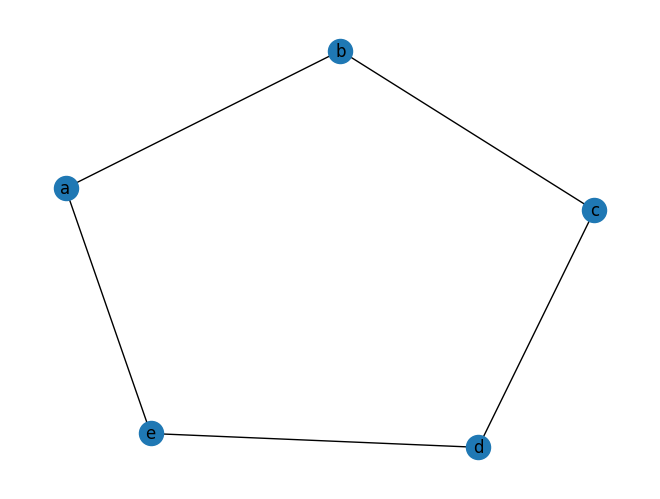

In [ ]:
def make_circule_graph(n):
    G = nx.Graph()
    nodes = list('abcdefghijklmnopqrstuvwxyz')[:n]
    for i in range(n):
        G.add_node(nodes[i])
        G.add_edge(nodes[i-1], nodes[i])
    nx.draw(G, with_labels=True)

make_circule_graph(5)

1.3. Создать функцию, генерирующую граф `Y` из `3n + 1` узлов (`n` - параметр функции), где центральный узел соединен с тремя путями длины n. Визуализировать полученный граф.

![image.png](attachment:image.png)

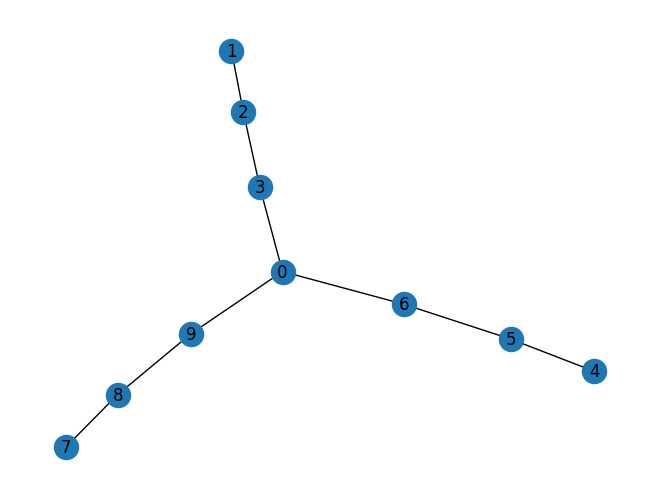

In [ ]:
def generate_path_graph(n):
    G = nx.Graph()
    num_paths = 3
    start_node = 0
    G.add_node(start_node)
    for _ in range(num_paths):
        cur_num_nodes = len(G)
        nx.add_path(G, range(cur_num_nodes, cur_num_nodes + n))
        G.add_edge(start_node, (_+1) * n) # or cur_num_nodes
    return G

G = generate_path_graph(n = 3)
nx.draw(G, with_labels=True)

### 2. Построение решеток

2.1 Построить квадратную решетку 5 на 4, используя встроенную функцию `networkx`, и визуализировать ее.

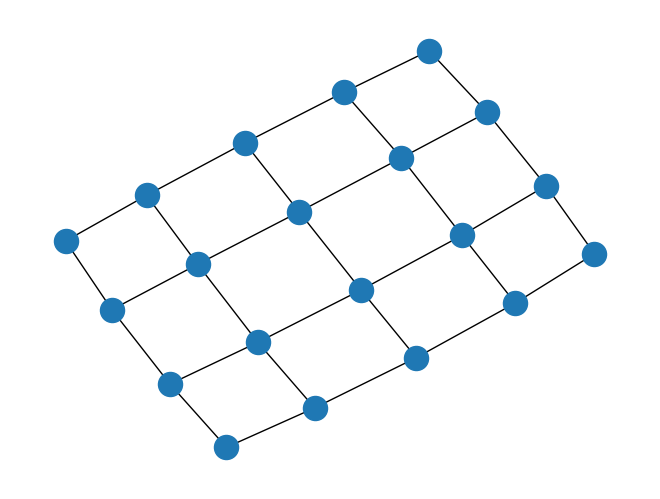

In [ ]:
G = nx.grid_2d_graph(5, 4)
nx.draw(G)

2.2 Реализовать собственную функцию создания квадратной решетки `n` на `m`. Создать с ее помощью решетку 5 на 4 и визуализировать ее.

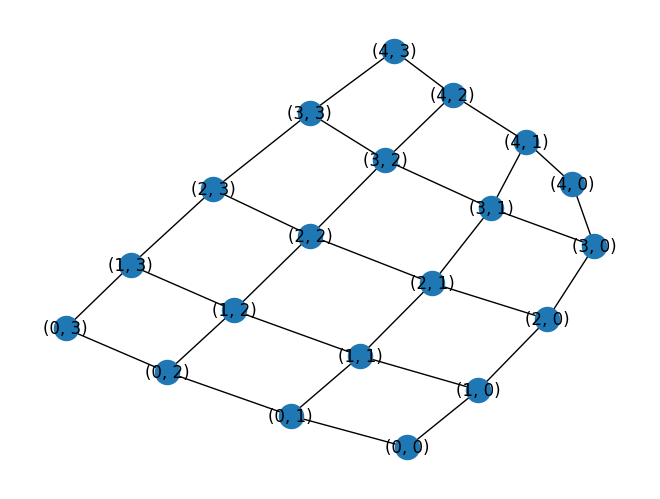

In [ ]:
def create_grid(rows = 5, cols = 4):
    G = nx.Graph()
    # G.add_nodes_from((i, j) for i in range(rows) for j in range(cols))
    nodes = [(i, j) for i in range(rows) for j in range(cols)]

    for i, j in nodes:
        if (i+1 < rows) and (j+1 < cols):
            G.add_edge((i, j), (i+1, j))
            G.add_edge((i, j), (i, j+1))
            G.add_edge((i+1, j), (i+1, j+1))
            G.add_edge((i, j+1), (i+1, j+1))
    nx.draw(G, with_labels=True)

create_grid()


2.3 Реализовать собственную функцию создания квадратной решетки `n` на `m`, которая сохраняет в графе информацию, позволяющую визуализировать сеть в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.

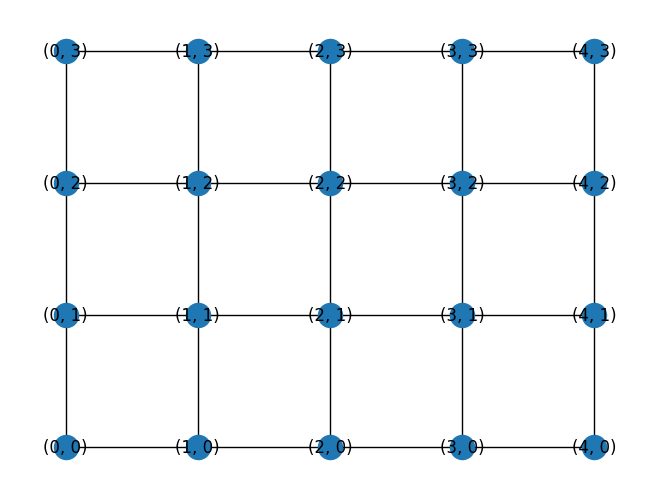

In [ ]:
def create_grid(rows = 5, cols = 4):
    G = nx.Graph()
    # G.add_nodes_from((i, j) for i in range(rows) for j in range(cols))
    nodes = [(i, j) for i in range(rows) for j in range(cols)]

    for i, j in nodes:
        if (i+1 < rows) and (j+1 < cols):
            G.add_edge((i, j), (i+1, j))
            G.add_edge((i, j), (i, j+1))
            G.add_edge((i+1, j), (i+1, j+1))
            G.add_edge((i, j+1), (i+1, j+1))

    pos = dict(zip(nodes, nodes))

    return G, pos

graph, pos = create_grid()
nx.draw(graph, with_labels=True, pos=pos)

2.4 Модифицировать функцию 2.3 так, чтобы решетку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.

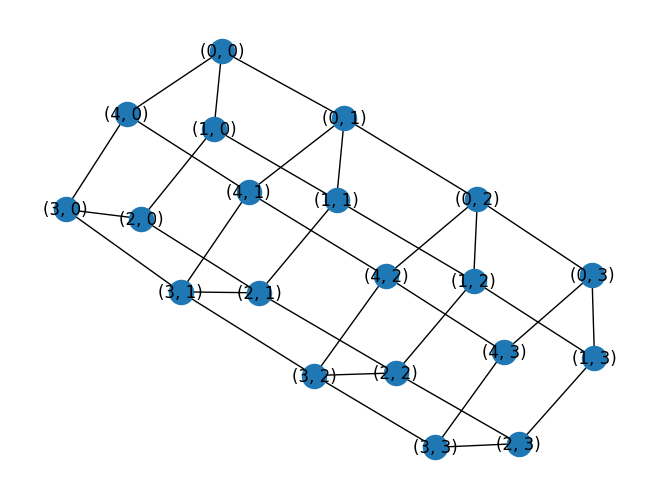

In [ ]:
def create_grid(rows = 5, cols = 4, link_rows=False, link_columns=False):
    G = nx.Graph()
    # G.add_nodes_from((i, j) for i in range(rows) for j in range(cols))
    nodes = [(i, j) for i in range(rows) for j in range(cols)]

    for i, j in nodes:
        if (i+1 < rows) and (j+1 < cols):
            G.add_edge((i, j), (i+1, j))
            G.add_edge((i, j), (i, j+1))
            G.add_edge((i+1, j), (i+1, j+1))
            G.add_edge((i, j+1), (i+1, j+1))
    if link_rows:
        for i in range(cols):
            G.add_edge((0, i), (rows-1, i))
    if link_columns:
        for i in range(rows):
            G.add_edge((i, 0), (i, cols-1))
    return G

G = create_grid(link_rows=True)
nx.draw(G, with_labels=True)

### 3. (u, v) цветок

Граф «(u,v) цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длиной u и v соответственно (см.рис).

![image.png](attachment:image.png)

3.1 Реализовать функцию построения (1, 2) цветка. Функция принимает один целочисленный параметр `n` - количество шагов построения.

[(0, 3), (3, 1)]
[(0, 4), (4, 1), (0, 5), (5, 3), (1, 6), (6, 3)]
[(0, 7), (7, 1), (0, 8), (8, 3), (0, 9), (9, 4), (0, 10), (10, 5), (1, 11), (11, 3), (1, 12), (12, 4), (1, 13), (13, 6), (3, 14), (14, 5), (3, 15), (15, 6)]


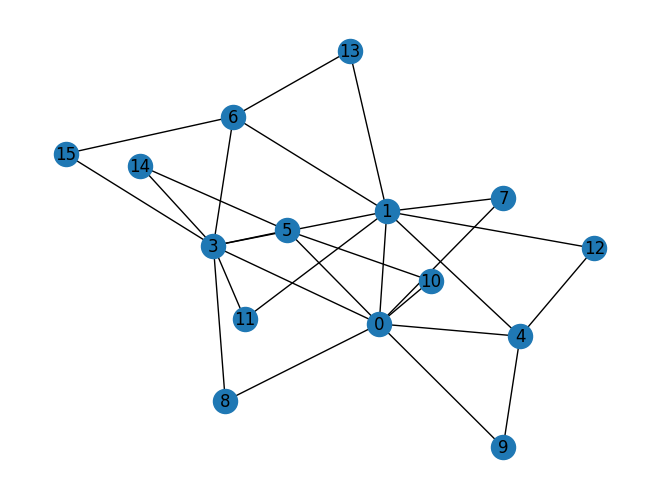

In [ ]:
def flower_graph(n):
    G = nx.Graph()
    G.add_edge(0, 1)

    for step in range(n):
        new_edges = []
        last_node = len(G)
        for edge in list(G.edges()):
            new_edges.extend([(edge[0], last_node+1), (last_node+1, edge[1])])
            last_node += 1
        print(new_edges)
        G.add_edges_from(new_edges)

    return G

g_3_1 = flower_graph(3)
nx.draw(g, with_labels=True)

3.2 Для графа, построенного в задаче 3.1, посчитать количество узлов, количество связей, среднюю степень узла.

In [ ]:
print(f'количество узлов : {len(G)}')
print(f'количество связей : {len(list(G.edges()))}')
print(f'средняя степень узла : {sum(G.degree(node) for node in G.nodes()) / len(g)}')

количество узлов : 20
количество связей : 35
средняя степень узла : 4.666666666666667


3.3 Визуализировать граф, построенный в задаче 3.1, с указанием идентификаторов узлов.

3.4 Для графа, построенного в задаче 3.1, посчитать степень каждого узла и сохранить информацию о ней в самом узле

In [ ]:
nx.set_node_attributes(g, {node: {'degree' : g.degree(node)} for node in g.nodes()})
g.nodes.data()

NodeDataView({0: {'degree': 8}, 1: {'degree': 8}, 3: {'degree': 8}, 4: {'degree': 4}, 5: {'degree': 4}, 6: {'degree': 4}, 7: {'degree': 2}, 8: {'degree': 2}, 9: {'degree': 2}, 10: {'degree': 2}, 11: {'degree': 2}, 12: {'degree': 2}, 13: {'degree': 2}, 14: {'degree': 2}, 15: {'degree': 2}})

In [ ]:
nx.get_node_attributes(g, 'degree')

{0: 8,
 1: 8,
 3: 8,
 4: 4,
 5: 4,
 6: 4,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2}

3.5 Создать визуализацию графа, построенного в задаче 3.1, в которой размер узла определяется его степенью (с указанием идентификаторов узлов).

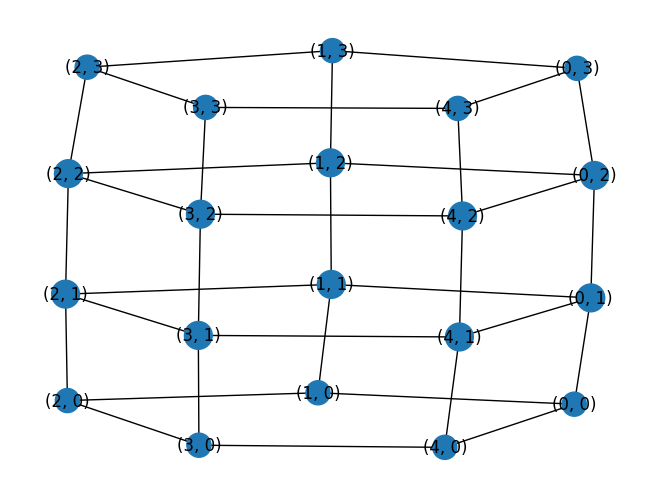

In [ ]:
list_degree = list(G.degree())
nodes , degree = map(list, zip(*list_degree))
nx.draw(G, nodelist=nodes, node_size=[(v * 100)+1 for v in degree], with_labels=True)

3.6 Реализовать функцию построения (u,v) цветка. Функция принимает на вход 3 параметра: `u` – длина 1го пути при замене связи; `v` – длина 2го пути при замене связи; `n` - количество шагов построения.

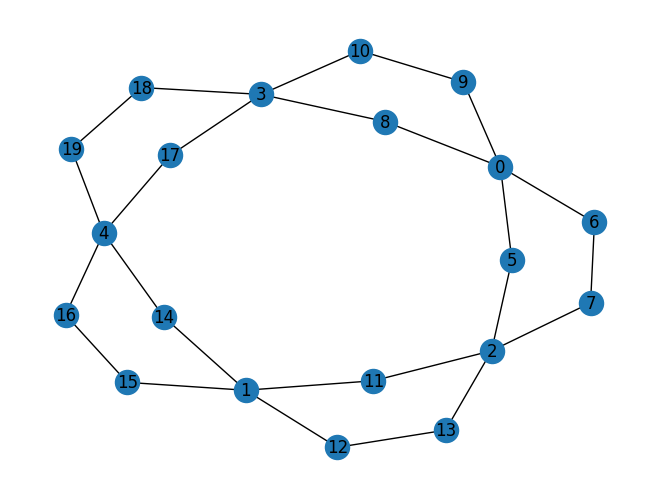

In [ ]:
def flower_graph_U_V(n, u = 2, v = 3):
    G = nx.Graph()
    G.add_edge(0, 1)
    u -= 1
    v -= 1
    for step in range(n):
        new_edges = []
        last_node = len(G)

        for edge in list(G.edges()):
            nx.add_path(G, range(last_node, last_node + u))
            new_edges.extend([(edge[0], last_node), (last_node+u-1, edge[1])])
            # print((edge[0], last_node), (last_node+u-1, edge[1]))
            last_node = len(G)

            nx.add_path(G, range(last_node, last_node + v))
            new_edges.extend([(edge[0], last_node), (last_node+v-1, edge[1])])
            # print((edge[0], last_node), (last_node+v-1, edge[1]))
            last_node = len(G)

            G.remove_edge(edge[0], edge[1])

        G.add_edges_from(new_edges)

    return G

g = flower_graph_U_V(2)
nx.draw(g, with_labels=True)

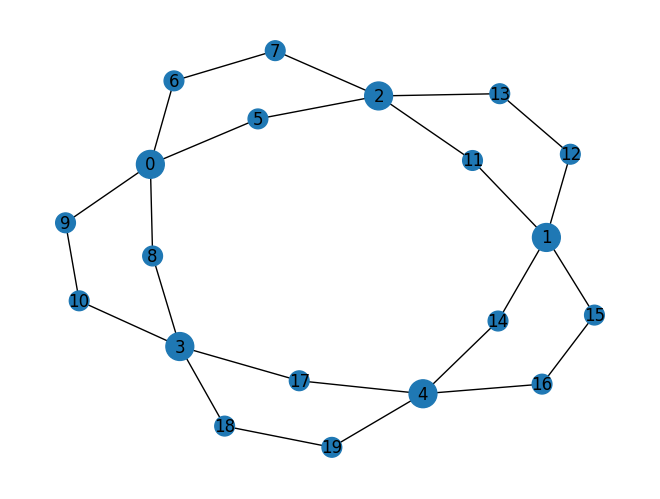

In [ ]:
list_degree = list(g.degree())
nodes , degree = map(list, zip(*list_degree))
nx.draw(g, nodelist=nodes, node_size=[(v * 100)+1 for v in degree], with_labels=True)

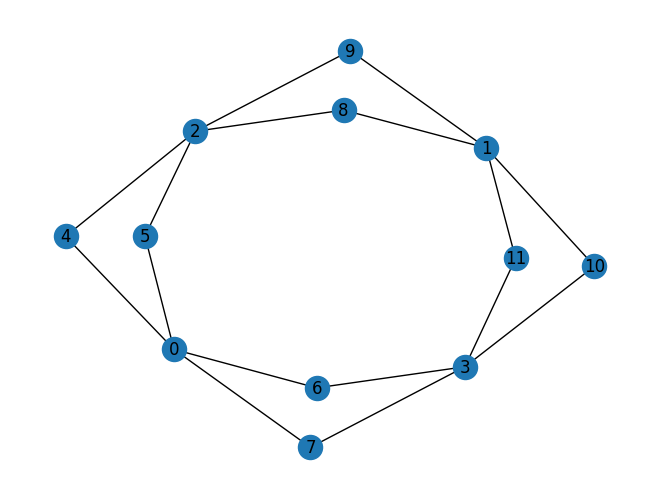

In [ ]:
g = flower_graph(2, 2, 2)
nx.draw(g, with_labels=True)

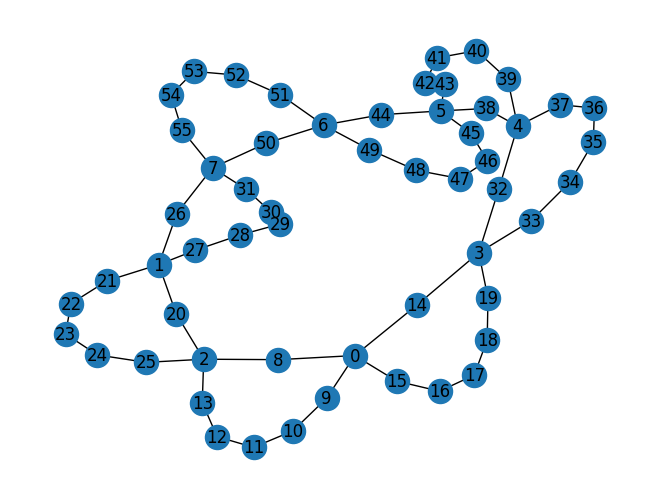

In [ ]:
g = flower_graph(2, 2, 6)
nx.draw(g, with_labels=True)

### 4. Для построенного графа 1.2 цветка получить:

4\.1 Значение коэфициента кластеризации каждого узла и сохранить информацию о ней в самом узле.


In [ ]:
node_clustering = nx.clustering(g_3_1)
nx.set_node_attributes(g_3_1, {node: {'clust_coef' : clust_coef} for node, clust_coef in node_clustering.items()})
g_3_1.nodes.data()

NodeDataView({0: {'clust_coef': 0.25}, 1: {'clust_coef': 0.25}, 3: {'clust_coef': 0.25}, 4: {'clust_coef': 0.5}, 5: {'clust_coef': 0.5}, 6: {'clust_coef': 0.5}, 7: {'clust_coef': 1.0}, 8: {'clust_coef': 1.0}, 9: {'clust_coef': 1.0}, 10: {'clust_coef': 1.0}, 11: {'clust_coef': 1.0}, 12: {'clust_coef': 1.0}, 13: {'clust_coef': 1.0}, 14: {'clust_coef': 1.0}, 15: {'clust_coef': 1.0}})

4\.2 Визуализацию графа, в котрой размер узла определяется его коэффициентом кластреризации.

4\.5 Визуализацию графа, в котрой цвет узла определяется его коэффициентом кластреизации.

4\.6 Визуализацию графа, в котрой коэффициентом кластреизации демонстрируется в подписи к узлу.

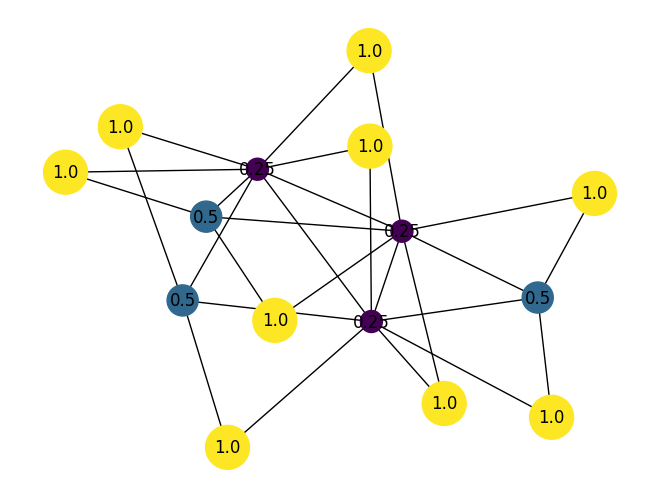

In [ ]:
labels = nx.get_node_attributes(g_3_1, 'clust_coef')
nodes = list(nx.get_node_attributes(g_3_1, 'clust_coef').keys())
clust_coefs = list(nx.get_node_attributes(g_3_1, 'clust_coef').values())
nx.draw(g_3_1, nodelist=nodes, node_size=[(v * 1000)+1 for v in clust_coefs],
        node_color=clust_coefs, cmap=plt.cm.viridis, labels=labels, with_labels=True)

4\.7 Среднее значение коэффицента кластеризации для всего графа.

In [ ]:
nx.average_clustering(g_3_1)

0.75

### 5. Для построенного графа 1.2 цветка получить:

5\.1 Распределение степеней узлов в виде списка картежей вида: (степень, количество\_узлов\_с\_данной\_степенью), картежи в списке отсортированы по возрастанию степени.

In [ ]:
degrees = [degree for node, degree in g_3_1.degree()]
degree_n_nodes = []
for elem in sorted(set(degrees)):
    degree_n_nodes.append((elem, degrees.count(elem)))

degree_n_nodes

[(2, 19683),
 (4, 6561),
 (8, 2187),
 (16, 729),
 (32, 243),
 (64, 81),
 (128, 27),
 (256, 9),
 (512, 3),
 (1024, 3)]

5\.2 График распределения степеней узлов.

In [ ]:
g_3_1 = flower_graph(10)

[(0, 3), (3, 1)]
[(0, 4), (4, 1), (0, 5), (5, 3), (1, 6), (6, 3)]
[(0, 7), (7, 1), (0, 8), (8, 3), (0, 9), (9, 4), (0, 10), (10, 5), (1, 11), (11, 3), (1, 12), (12, 4), (1, 13), (13, 6), (3, 14), (14, 5), (3, 15), (15, 6)]
[(0, 16), (16, 1), (0, 17), (17, 3), (0, 18), (18, 4), (0, 19), (19, 5), (0, 20), (20, 7), (0, 21), (21, 8), (0, 22), (22, 9), (0, 23), (23, 10), (1, 24), (24, 3), (1, 25), (25, 4), (1, 26), (26, 6), (1, 27), (27, 7), (1, 28), (28, 11), (1, 29), (29, 12), (1, 30), (30, 13), (3, 31), (31, 5), (3, 32), (32, 6), (3, 33), (33, 8), (3, 34), (34, 11), (3, 35), (35, 14), (3, 36), (36, 15), (4, 37), (37, 9), (4, 38), (38, 12), (5, 39), (39, 10), (5, 40), (40, 14), (6, 41), (41, 13), (6, 42), (42, 15)]
[(0, 43), (43, 1), (0, 44), (44, 3), (0, 45), (45, 4), (0, 46), (46, 5), (0, 47), (47, 7), (0, 48), (48, 8), (0, 49), (49, 9), (0, 50), (50, 10), (0, 51), (51, 16), (0, 52), (52, 17), (0, 53), (53, 18), (0, 54), (54, 19), (0, 55), (55, 20), (0, 56), (56, 21), (0, 57), (57, 22),

(array([2.9484e+04, 2.7000e+01, 9.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   2. ,  104.2,  206.4,  308.6,  410.8,  513. ,  615.2,  717.4,
         819.6,  921.8, 1024. ]),
 <BarContainer object of 10 artists>)

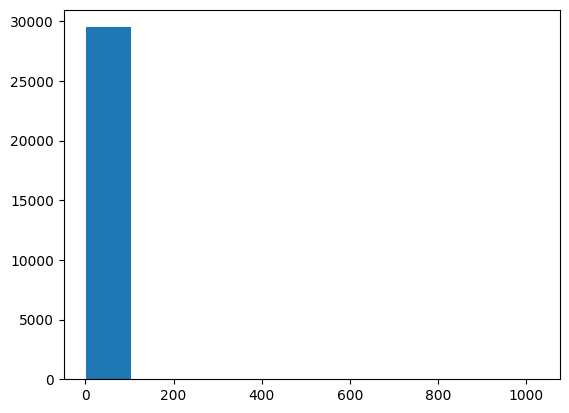

In [ ]:
plt.hist(degrees)

5\.3 График распределения степеней узлов, в котором по вертикальной оси откладыватся выборочная частота. Отобразить график в трех масштабах осей: (x, y), (x, ln y), (ln x, ln y).

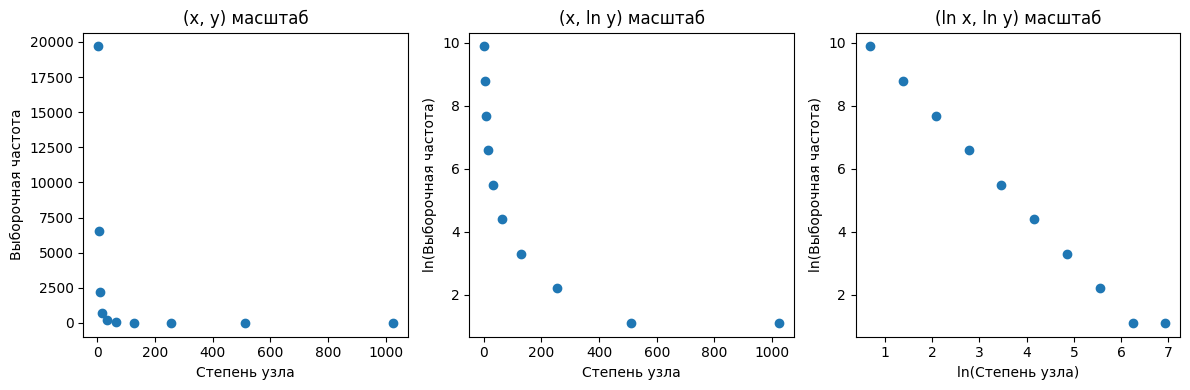

In [ ]:
degree, n_nodes = map(list, zip(*degree_n_nodes))

degree_freq = nx.degree_histogram(g_3_1)

plt.figure(figsize=(12, 4))

plt.subplot(131) # График (x, y)
plt.scatter(degree, n_nodes)
plt.xlabel('Степень узла')
plt.ylabel('Выборочная частота')
plt.title('(x, y) масштаб')

plt.subplot(132) # График (x, ln y)
plt.scatter(degree, np.log(n_nodes))
plt.xlabel('Степень узла')
plt.ylabel('ln(Выборочная частота)')
plt.title('(x, ln y) масштаб')

plt.subplot(133) # График (ln x, ln y)
plt.scatter(np.log(degree), np.log(n_nodes))
plt.xlabel('ln(Степень узла)')
plt.ylabel('ln(Выборочная частота)')
plt.title('(ln x, ln y) масштаб')

plt.tight_layout()
plt.show()

###6. Для построенного графа 1.2 цветка получить:

6\.1\. Два произвольных узла и кратчайший путь между ними.

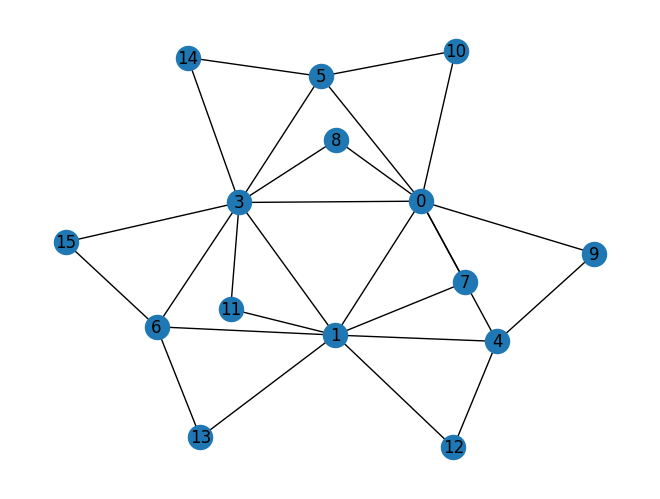

In [ ]:
nx.draw(g_3_1, with_labels=True)

In [ ]:
nx.shortest_path(g_3_1, 15, 7)

[15, 3, 0, 7]

6\.2\. Визуализировать кратчайший путь, полученный в предыдущем пункте, используя связи другого цвета и другой толщины.

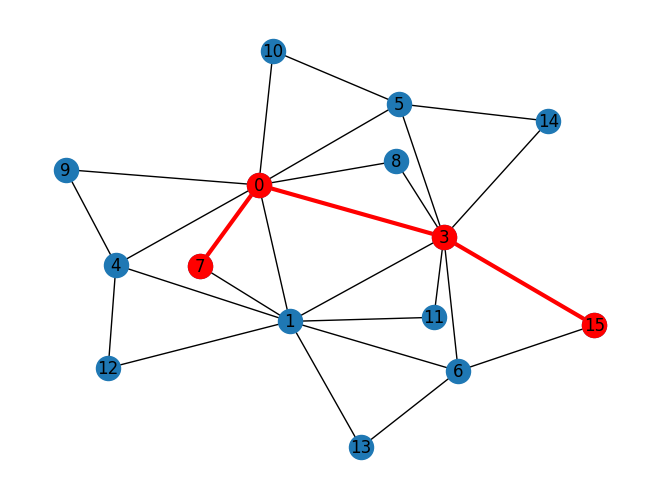

In [ ]:
pos = nx.spring_layout(g_3_1)
nx.draw(g_3_1, pos=pos, with_labels=True)

path = nx.shortest_path(g_3_1, 15, 7)
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_nodes(g_3_1, pos, nodelist=path,node_color='r')
nx.draw_networkx_edges(g_3_1, pos, edgelist=path_edges,edge_color='r',width=3)
plt.show()

6\.3\. Средний кратчайший путь для всего графа.

In [ ]:
nx.average_shortest_path_length(g_3_1)

1.9428571428571428

6\.4\. Диаметр графа.

In [ ]:
nx.diameter(g_3_1)

3

###7. опять цветы

7\. Релизовать функцию построения u,v цветка. Функция принимает на вход 3 параметра: u – длина 1го пути при замене связи; v – длина 2го пути при замене связи; n - количество шагов построения.